# Comparing effect of KRAS Mutation in Ovarian cancer on Transcriptomics and Proteomics

Investigate how transcript and proteomic levels are altered when KRAS is mutated in Ovarian cancer for proteins who showed significant differences in Transcript expression

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import cptac
import cptac.algorithms as al

ov = cptac.Ovarian()

/anaconda3/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


### Specify Mutation Gene

In [2]:
mutation_gene = 'KRAS'

### Read in Trans Results and filter for ovarian cancer and ARID1A Mutation

In [3]:
#Read in Results of Trans Analysis
Trans_Results = pd.read_csv("../Formatted_Trans_Results.csv")

#Filter for only Colon cancer, and only MUC5B Mutation
Ovarian = Trans_Results.loc[Trans_Results['Cancer_Type'] == 'Ovarian']
gene_Ovarian = Ovarian.loc[Ovarian['Mutation_Gene'] == mutation_gene]

### Split proteomics and transcriptomics

In [4]:
gene_Ovarian_Prot = gene_Ovarian.loc[gene_Ovarian['Omics'] == 'proteomics']
gene_Ovarian_Trans = gene_Ovarian.loc[gene_Ovarian['Omics'] == 'transcriptomics']

### Display proteomics

In [5]:
print(len(gene_Ovarian_Prot))
display(gene_Ovarian_Prot)

1


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
266,Ovarian,KRAS,ZBED1,NaN,proteomics,False,0.000003


### Display Transcriptomics

In [6]:
print(len(gene_Ovarian_Trans))
display(gene_Ovarian_Trans)

244


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
277,Ovarian,KRAS,OR1L3,NaN,transcriptomics,False,8.293846e-28
278,Ovarian,KRAS,FAM90A27P,NaN,transcriptomics,False,1.188688e-23
279,Ovarian,KRAS,TRPM6,NaN,transcriptomics,False,7.448553e-18
280,Ovarian,KRAS,VPS13A,NaN,transcriptomics,False,4.204536e-17
281,Ovarian,KRAS,SERPINA11,NaN,transcriptomics,False,8.462675e-17
282,Ovarian,KRAS,GABRP,NaN,transcriptomics,False,9.499937e-17
283,Ovarian,KRAS,MOGAT1,NaN,transcriptomics,False,2.312500e-16
284,Ovarian,KRAS,OR5M1,NaN,transcriptomics,False,2.313998e-16
285,Ovarian,KRAS,PRAMEF17,NaN,transcriptomics,False,2.313998e-16
286,Ovarian,KRAS,VPS52,NaN,transcriptomics,False,2.313998e-16


<br><br>When ARID1A is mutated in Ovarian cancer, 210 transcripts are significantly altered, yet only 8 proteomics <br><br>

### Generate lists of proteins significantly altered in proteomic expression and transcript expression when ARID1A mutated

In [7]:
prots_gene_Ovarian = list(gene_Ovarian_Prot['Protein'])
rna_gene_Ovarian = list(gene_Ovarian_Trans['Protein'])

### Make plot illustrating $Δ$ transcriptomics and  $Δ$ proteomics the above genes showing altered transcripts when FSIP2 is mutated

### Compute $Δ$ proteomics for above proteins

In [8]:
delta_proteomics = {}

#Loop through proteins found in both lists
for prot in rna_gene_Ovarian:
    #Use join omics to mutations to compare proteomic levels when mutation gene is mutated
    proteomic_df = ov.join_omics_to_mutations(mutations_genes=mutation_gene, omics_df_name='proteomics',omics_genes=prot)
    
    #Use only Tumor samples
    proteomic_df = proteomic_df.loc[proteomic_df['Sample_Status'] == 'Tumor']
    
    #Split into mutated and wildtype groups
    mutated_df = proteomic_df.loc[proteomic_df[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor']
    wt_df = proteomic_df.loc[proteomic_df[mutation_gene + '_Mutation_Status'] == 'Wildtype_Tumor']
    
    #Compute mean proteomic values for both mutated and wildtype groups
    mutated_mean = np.mean(mutated_df[prot + '_proteomics'])
    wt_mean = np.mean(wt_df[prot + '_proteomics'])
    
    #Compute Delta (mutated mean - wildtype mean) proteomic value
    delta = mutated_mean - wt_mean
    
    #Store values in Dictionary
    delta_proteomics[prot] = delta

### Print $Δ$ proteomics

In [9]:
delta_proteomics

{'OR1L3': nan,
 'FAM90A27P': nan,
 'TRPM6': nan,
 'VPS13A': 0.4344182205185185,
 'SERPINA11': 1.444348097653846,
 'GABRP': nan,
 'MOGAT1': nan,
 'OR5M1': nan,
 'PRAMEF17': nan,
 'VPS52': 0.03270462582098768,
 'AQP2': nan,
 'BRD2': BRD2_proteomics    0.253097
 BRD2_proteomics    0.261571
 dtype: float64,
 'C18orf64': nan,
 'CREB3L4': nan,
 'DAXX': 0.06822993787037038,
 'GLRA1': nan,
 'IQCF2': nan,
 'KCNK18': nan,
 'KRTAP9-2': nan,
 'KRTAP9-6': nan,
 'KRTAP9-7': nan,
 'KRTAP9-8': nan,
 'LOC100294145': nan,
 'LOC101927257': nan,
 'LOC101928600': nan,
 'OR9G4': nan,
 'RGL2': 0.08078703588271607,
 'RPS18': 0.2380391236419753,
 'SLC6A1-AS1': nan,
 'SNAR-A13': nan,
 'ST7-AS1': nan,
 'WDR46': -0.0537757917654321,
 'SLC22A7': nan,
 'SNORD70': nan,
 'SCGB1D4': nan,
 'GP2': nan,
 'MBD3L4': nan,
 'MBD3L2': nan,
 'MMP26': nan,
 'MBD3L5': nan,
 'MBD3L3': nan,
 'TRIM49B': nan,
 'TRIM53AP': nan,
 'TRIM48': nan,
 'TRIM51': nan,
 'PRAMEF7': nan,
 'SERPINA4': 0.22431446018518517,
 'LOC100505782': nan,
 '

### Compute $Δ$ transcriptomics for above proteins

In [10]:
delta_transcriptomics = {}

#Loop through proteins found in both lists
for prot in rna_gene_Ovarian:
    #Use join omics to mutations to compare transcript levels when mutation gene is mutated
    transcript_df = ov.join_omics_to_mutations(mutations_genes=mutation_gene, omics_df_name='transcriptomics',omics_genes=prot)
    
    #Use only Tumor samples
    transcript_df = transcript_df.loc[transcript_df['Sample_Status'] == 'Tumor']
    
    #Split into mutated and wildtype groups
    mutated_df = transcript_df.loc[transcript_df[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor']
    wt_df = transcript_df.loc[transcript_df[mutation_gene + '_Mutation_Status'] == 'Wildtype_Tumor']
    
    #Compute mean transcriptomic values for both mutated and wildtype groups
    mutated_mean = np.mean(mutated_df[prot + '_transcriptomics'])
    wt_mean = np.mean(wt_df[prot + '_transcriptomics'])
    
    #Compute Delta (mutated mean - wildtype mean) transcriptomics value
    delta = mutated_mean - wt_mean
    
    #Store values in Dictionary
    delta_transcriptomics[prot] = delta

### Print $Δ$ transcriptomics

In [11]:
delta_transcriptomics

{'OR1L3': 0.16375494747474748,
 'FAM90A27P': 0.4859909787878788,
 'TRPM6': 1.327319965959596,
 'VPS13A': 36.59409141414141,
 'SERPINA11': 9.614933237373737,
 'GABRP': 113.34214294949494,
 'MOGAT1': 10.539333680808081,
 'OR5M1': 0.019706349999999997,
 'PRAMEF17': 0.04390735,
 'VPS52': 12.32355,
 'AQP2': 0.0724895,
 'BRD2': 50.9435,
 'C18orf64': 0.0698195,
 'CREB3L4': 56.148,
 'DAXX': 16.379,
 'GLRA1': 0.00999445,
 'IQCF2': 0.035486250000000004,
 'KCNK18': 0.015171899999999999,
 'KRTAP9-2': 0.1429925,
 'KRTAP9-6': 0.09402150000000001,
 'KRTAP9-7': 0.39818400000000004,
 'KRTAP9-8': 0.1095865,
 'LOC100294145': 4.95694,
 'LOC101927257': 0.00850875,
 'LOC101928600': 0.014741049999999999,
 'OR9G4': 0.018849750000000002,
 'RGL2': 15.74685,
 'RPS18': 341.594,
 'SLC6A1-AS1': 0.0364587,
 'SNAR-A13': 2.77002,
 'ST7-AS1': 0.968385,
 'WDR46': 16.40785,
 'SLC22A7': 0.00975625,
 'SNORD70': 20.59545,
 'SCGB1D4': 1362.7896755858585,
 'GP2': 2.668988981818182,
 'MBD3L4': 9.310389735353535,
 'MBD3L2': 5.5

## Illustrate $Δ$ proteomics and $Δ$ transcriptomics in a plot

### Format data in dataframe

In [12]:
#Make Pandas Dataframe
delta_proteomic_transcriptomic_df = pd.DataFrame(columns=['Protein','Delta_Proteomics','Delta_Transcriptomics'])

#Fill with values from delta proteomics and delta transcriptomics dictionaries
for key, val in delta_proteomics.items():
    delta_proteomic_transcriptomic_df = delta_proteomic_transcriptomic_df.append({'Protein':key, 'Delta_Proteomics':val,'Delta_Transcriptomics':delta_transcriptomics[key]}, ignore_index = True)

In [13]:
delta_proteomic_transcriptomic_df = delta_proteomic_transcriptomic_df.dropna(axis = 0)

#Keep only rows that have float type in delta_proteomics column
delta_proteomic_transcriptomic_df = delta_proteomic_transcriptomic_df.loc[delta_proteomic_transcriptomic_df['Delta_Proteomics'].apply(lambda x: isinstance(x, float))]

delta_proteomic_transcriptomic_df

,Protein,Delta_Proteomics,Delta_Transcriptomics
3,VPS13A,0.434418,36.594091
4,SERPINA11,1.44435,9.614933
9,VPS52,0.0327046,12.323550
14,DAXX,0.0682299,16.379000
26,RGL2,0.080787,15.746850
27,RPS18,0.238039,341.594000
31,WDR46,-0.0537758,16.407850
46,SERPINA4,0.224314,17.247606
52,TFF3,4.00305,832.160697
55,SCGB1D2,5.17039,4840.035953


### Plot $Δ$ proteomics and $Δ$ transcriptomics in a scatter plot

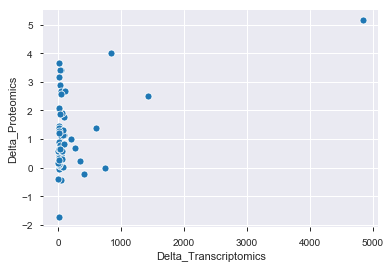

In [14]:
scatter_plot = sns.scatterplot(data=delta_proteomic_transcriptomic_df, x='Delta_Transcriptomics', y='Delta_Proteomics')
